**What is Explainable AI ?**

Explainable AI can help humans understand and explain machine learning (ML) algorithms, deep learning and neural networks. ML models are often thought of as black boxes that are impossible to interpret.² Neural networks used in deep learning are some of the hardest for a human to understand. Bias, often based on race, gender, age or location, has been a long-standing risk in training AI models. Further, AI model performance can drift or degrade because production data differs from training data. This makes it crucial for a business to continuously monitor and manage models to promote AI explainability while measuring the business impact of using such algorithms. Explainable AI also helps promote end user trust, model auditability and productive use of AI. It also mitigates compliance, legal, security and reputational risks of production AI.  Explainable AI can improve the user experience of a product or service by helping the end user trust that the AI is making good decisions.

**Comparing AI and XAI**

What exactly is the difference between “regular” AI and explainable AI? XAI implements specific techniques and methods to ensure that each decision made during the ML process can be traced and explained. AI, on the other hand, often arrives at a result using an ML algorithm, but the architects of the AI systems do not fully understand how the algorithm reached that result. This makes it hard to check for accuracy and leads to loss of control, accountability and auditability.

The setup of XAI techniques consists of three main methods


- Prediction accuracy
Accuracy is a key component of how successful the use of AI is in everyday operation. By running simulations and comparing XAI output to the results in the training data set, the prediction accuracy can be determined. The most popular technique used for this is Local Interpretable Model-Agnostic Explanations (LIME), which explains the prediction of classifiers by the ML algorithm.

- Traceability
Traceability is another key technique for accomplishing XAI. This is achieved, for example, by limiting the way decisions can be made and setting up a narrower scope for ML rules and features. An example of a traceability XAI technique is DeepLIFT (Deep Learning Important FeaTures), which compares the activation of each neuron to its reference neuron and shows a traceable link between each activated neuron and even shows dependencies between them.

- Decision understanding
This is the human factor. Many people have a distrust in AI, yet to work with it efficiently, they need to learn to trust it. This is accomplished by educating the team working with the AI so they can understand how and why the AI makes decisions.


With explainable AI, a business can troubleshoot and improve model performance while helping stakeholders understand the behaviors of AI models. Investigating model behaviors through tracking model insights on deployment status, fairness, quality and drift is essential to scaling AI.

![image.png](attachment:image.png)

### **Loading**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
%pip install indic-nlp-library

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [77]:
# df = pd.read_csv('/content/drive/MyDrive/Dravidian Offensive 2021/Tamil_hasoc_tanglish_test_withlabels.tsv',sep = '\t')
df = pd.read_excel('/content/Tamil-Codemixed_offensive_data_Training-Tweet-HL.xlsx')

df.head()

Unnamed: 0                                              texts labels
0   TA_HL100  Iyaooo Kovam pattutene sothula visatha vachuru...    NOT
1   TA_HL101  @Asha Apo neenga atha government ku theriya pa...    NOT
2   TA_HL102  @Bala sundar ayyo sorry...antha line ah explai...    NOT
3   TA_HL105  @kalimuthu ne ena lusa...yaaru edhu panaalum e...    NOT
4   TA_HL109  1st baby ku neat ah feed panunga plzz ipdi iru...    NOT

In [5]:
!pip install lime shape stanza

In [6]:
df.columns = ["id","text","category"]
df = df[df['text'].str.len() > 0]

In [ ]:
import stanza
stanza.download('ta')
nlp = stanza.Pipeline(lang='ta', processors='tokenize,mwt,pos,lemma')
def lemmatize_text(str):
  doc= nlp(str)
  List= {word.lemma for sent in doc.sentences for word in sent.words }
  s= ' '
  s = s.join(List)
  return s
df["text"] = df.text.apply(lemmatize_text)


In [76]:
print(df['text'][0])

sothula vachuruvanugale Kovam . pattutene Iyaooo visatha ..iooo


In [9]:
def zeroorone(s):
  if(s == 'NOT'):
    return 0
  elif(s=='OFF'):
    return 1
  else :
    return 0

df['category'] = df.category.apply(zeroorone)

In [10]:
from urllib import response
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text = df['text'].values

In [11]:
response = tfidf.fit_transform(text)
y = df.category.values

### **Explainable AI**

In [78]:
y.shape

(4000,)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(response, y,test_size = 0.2, random_state = 4)

In [81]:
reg = linear_model.LogisticRegression(C=200.0,penalty= 'l2',solver = 'saga',multi_class = 'ovr', warm_start = True)

In [83]:
reg.fit(x_train, y_train)

The max_iter was reached which means the coef_ did not converge


LogisticRegression(C=200.0, multi_class='ovr', solver='saga', warm_start=True)

In [84]:
vocabulary = tfidf.get_feature_names_out()  # Assuming you used TfidfVectorizer
non_zero_indices = x_train[0].nonzero()[1]  # Assuming x_train is a sparse matrix
words = [vocabulary[index] for index in non_zero_indices]
sentence = " ".join(words)
print(sentence)

ashiga 25yrs 25m sigle jan teasser ajithism 3look poduveengannu track 10m audio oombu cdp nerayaa release engalukku from bday look rt tag user and vandhu movie aprm irukku single trailer illa innum la update 1st of nu


punda -- > **dhamakaana**

In [85]:
print(x_train[0])

  (0, 1385)	0.2063307926385228
  (0, 97)	0.2063307926385228
  (0, 96)	0.2063307926385228
  (0, 12762)	0.2063307926385228
  (0, 4948)	0.2063307926385228
  (0, 13611)	0.2063307926385228
  (0, 790)	0.2063307926385228
  (0, 130)	0.2063307926385228
  (0, 10940)	0.2063307926385228
  (0, 14567)	0.2063307926385228
  (0, 14)	0.19908824326860622
  (0, 1535)	0.19908824326860622
  (0, 8950)	0.12042565184539185
  (0, 2108)	0.16418754450041786
  (0, 8478)	0.19908824326860622
  (0, 11996)	0.14049778771275487
  (0, 3109)	0.19347048553626595
  (0, 3705)	0.15397974448624024
  (0, 1860)	0.16581233613799412
  (0, 6726)	0.17867264324025098
  (0, 12112)	0.07909062000540248
  (0, 13542)	0.14185542739060408
  (0, 15013)	0.035142236727506236
  (0, 1003)	0.10575106821673272
  (0, 15365)	0.13705942589002532
  (0, 7624)	0.133564144457885
  (0, 1259)	0.14753648550315332
  (0, 4614)	0.12398576554037752
  (0, 12799)	0.16581233613799412
  (0, 14572)	0.19347048553626595
  (0, 4156)	0.09081630902298861
  (0, 4307)	0.13

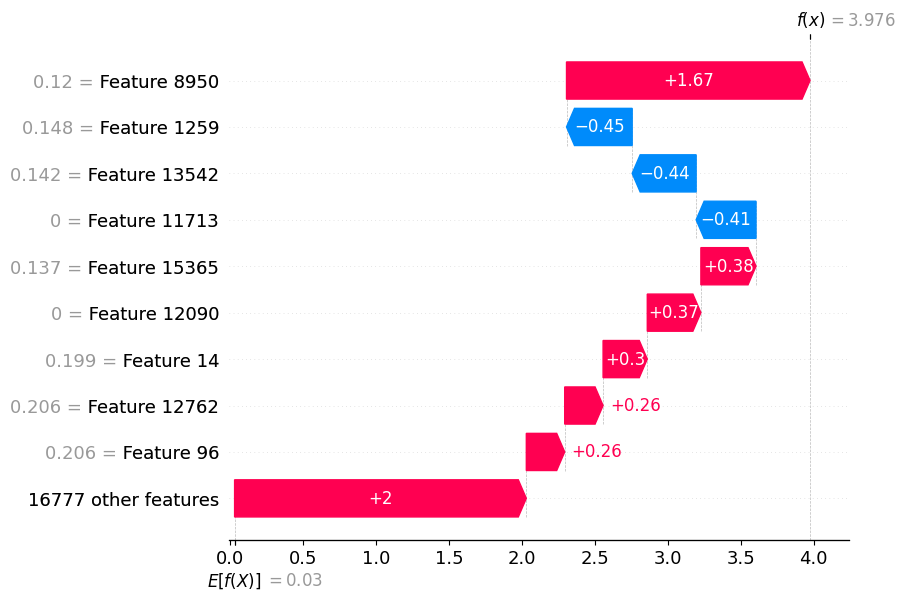

In [86]:
import shap
from sklearn.model_selection import train_test_split

# Create the SHAP explainer, passing both the model and training data
x_train_dense = x_train.toarray()  # Convert to dense array
explainer = shap.Explainer(reg, x_train_dense)  # Pass x_train here

# Calculate SHAP values for the training set
shap_values = explainer(x_train_dense)

# Visualize the first prediction's explanation with a waterfall plot
shap.plots.waterfall(shap_values[0])


In [87]:
y_train[0]

1

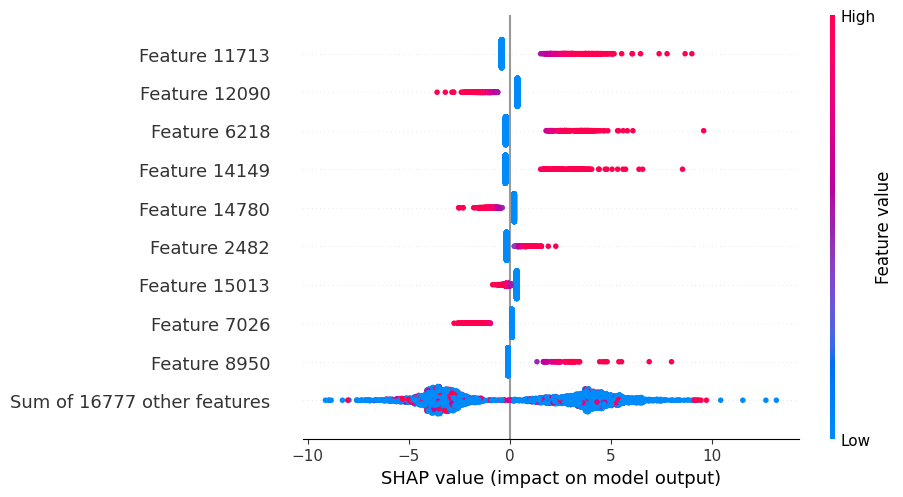

In [88]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

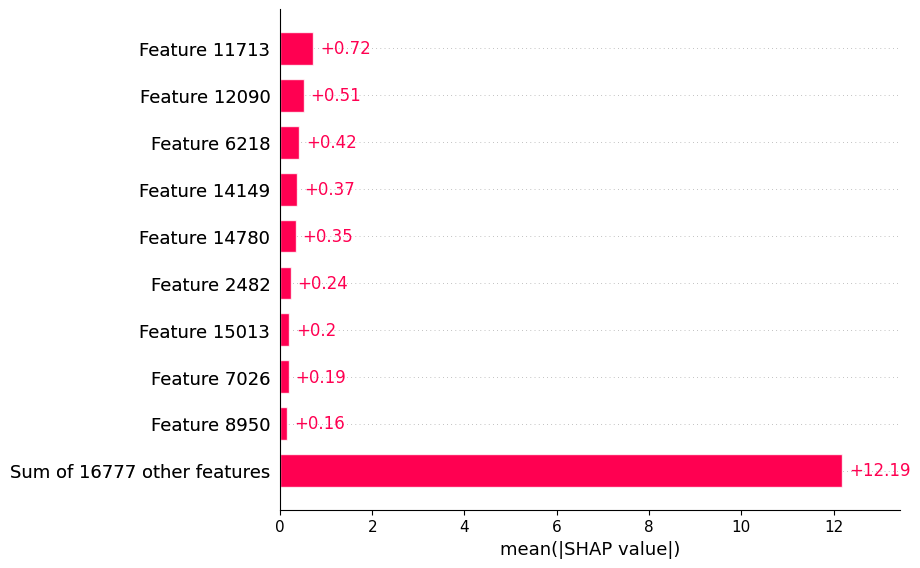

In [89]:
shap.plots.bar(shap_values)

In [90]:
reg.score(x_test,y_test)

0.835

In [91]:
from sklearn.metrics import classification_report

In [92]:
pred = reg.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       411
           1       0.83      0.83      0.83       389

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.84      0.83      0.84       800



### **Using KNN**

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [94]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [95]:
vocabulary = tfidf.get_feature_names_out()  # Assuming you used TfidfVectorizer
non_zero_indices = x_train[0].nonzero()[1]  # Assuming x_train is a sparse matrix
words = [vocabulary[index] for index in non_zero_indices]
sentence = " ".join(words)
print(sentence)

ashiga 25yrs 25m sigle jan teasser ajithism 3look poduveengannu track 10m audio oombu cdp nerayaa release engalukku from bday look rt tag user and vandhu movie aprm irukku single trailer illa innum la update 1st of nu


In [96]:
y_predict = knn.predict(x_test)

In [97]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       411
           1       0.79      0.79      0.79       389

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



In [98]:
import lime
from __future__ import print_function

In [99]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(tfidf,knn)

In [100]:
print(c.predict_proba([text[0]]))

[[0.71428571 0.28571429]]


In [101]:
print(c.predict_proba([text[0]]))
class_names = ['negative', 'positive']
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

[[0.71428571 0.28571429]]


In [102]:
idx = 83
exp = explainer.explain_instance(text[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([text[idx]])[0,1])
print('True class: %s' % class_names[1])

Document id: 83
Probability(christian) = 0.2857142857142857
True class: positive


In [103]:
exp.as_list()

[('konjo', 0.10872607059057583),
 ('ipd', 0.09425398888564591),
 ('sapadu', -0.08243735046032966),
 ('pannatheenga', -0.05266950439201582),
 ('chinna', -0.04465472429382644),
 ('kashdam', -0.03169459414880325)]

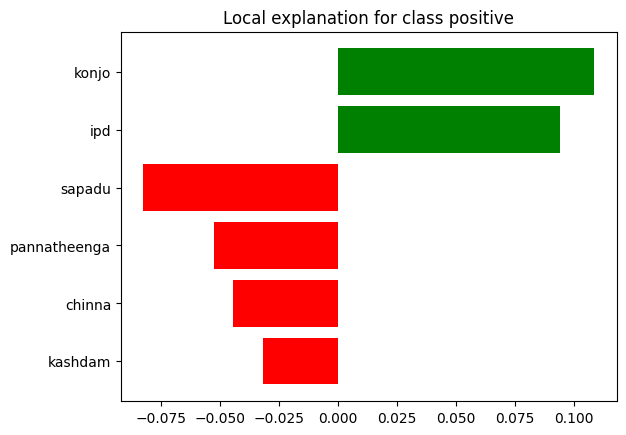

In [104]:

fig = exp.as_pyplot_figure()

In [105]:
exp.show_in_notebook(text=True)

### **Using Decision Tree**

In [106]:
from sklearn import tree

In [107]:
model = tree.DecisionTreeClassifier(splitter = 'random',min_samples_split = 3, random_state = 4, criterion = 'gini')

In [108]:
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=3, random_state=4, splitter='random')

In [109]:
y_predict = model.predict(x_test)

In [110]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       411
           1       0.79      0.79      0.79       389

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800



In [111]:
c = make_pipeline(tfidf,model)

In [112]:
print(c.predict_proba([text[4]]))
class_names = ['negative', 'positive']
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

[[1. 0.]]


In [113]:
idx = 5
exp = explainer.explain_instance(text[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([text[idx]])[0,1])
print('True class: %s' % class_names[1])

Document id: 5
Probability(christian) = 0.0
True class: positive


In [114]:
exp.as_list()

[('il', -0.9978829948152),
 ('ithula', 8.902942866884453e-05),
 ('2012', 8.58199023117758e-05),
 ('apdina', 5.6184892810656144e-05),
 ('iruku', 4.5938693909162626e-05),
 ('vazhgiromnu', 4.0758959208241195e-05)]

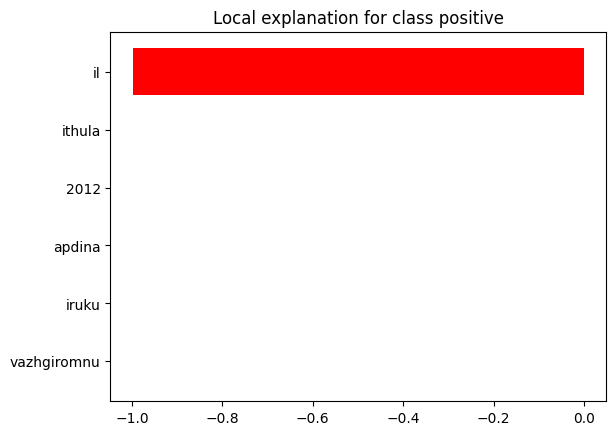

In [115]:

fig = exp.as_pyplot_figure()

In [116]:
exp.show_in_notebook(text=True)

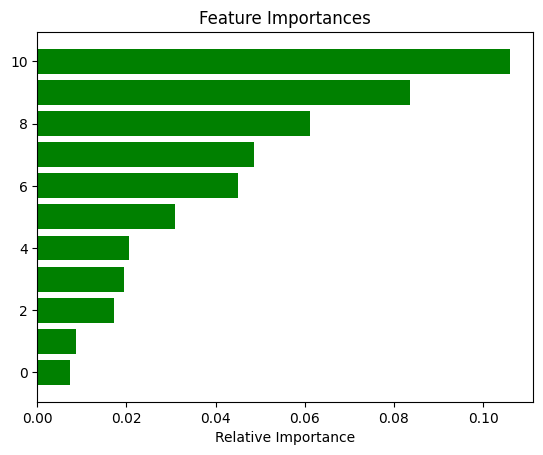

In [117]:
import numpy as np
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
j = 11# top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
plt.xlabel('Relative Importance')
plt.show()

In [118]:
feature_names = tfidf.get_feature_names_out()

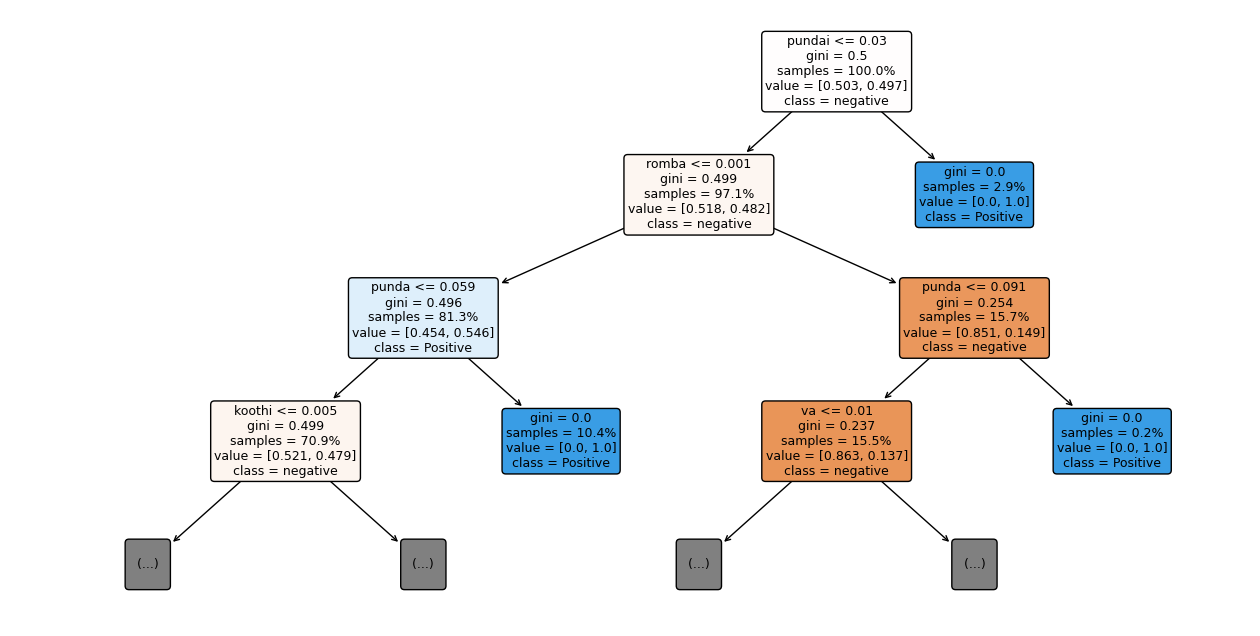

In [119]:
# visualization
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(model, feature_names = feature_names, class_names = ['negative', 'Positive'], max_depth=3, fontsize=9, proportion=True, filled=True, rounded=True)

In [120]:
from sklearn import tree

# Assuming you have your trained decision tree model named 'model'

# Create a DOT file representing the tree structure
tree.export_graphviz(model, out_file="tree.dot",
                     feature_names = feature_names,   # Assuming correct feature names
                     class_names=['negative', 'Positive'],
                     filled=True, rounded=True,
                     special_characters=True)  # Handle special characters

# Use a graph visualization tool (like Graphviz) to render the DOT file
# You can usually do this by running a command like:
# dot -Tpng tree.dot -o tree.png


### **Multinomial Naive Bayes**

In [121]:
from sklearn.naive_bayes import MultinomialNB

In [122]:
clf = MultinomialNB(alpha = 0.0, fit_prior = False)

In [123]:
clf.fit(x_train,y_train)

The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.


MultinomialNB(alpha=0.0, fit_prior=False)

In [124]:
y_predict = clf.predict(x_test)

In [125]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       411
           1       0.77      0.84      0.81       389

    accuracy                           0.80       800
   macro avg       0.81      0.80      0.80       800
weighted avg       0.81      0.80      0.80       800



In [126]:
c = make_pipeline(tfidf,clf)

In [127]:
print(c.predict_proba([text[4]]))
class_names = ['negative', 'positive']
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

[[1.00000000e+00 1.77877257e-18]]


In [128]:
idx = 89
exp = explainer.explain_instance(text[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([text[idx]])[0,1])
print('True class: %s' % class_names[1])

Document id: 89
Probability(christian) = 1.795935050326112e-09
True class: positive


In [129]:
exp.as_list()

[('konnutiye', -0.1630253194660305),
 ('pullaiya', -0.15898113984869264),
 ('jolly', -0.04368073573327888),
 ('ya', -0.008928705652759505),
 ('Dai', 0.008271987279637152),
 ('erukka', -0.007057537483940961)]

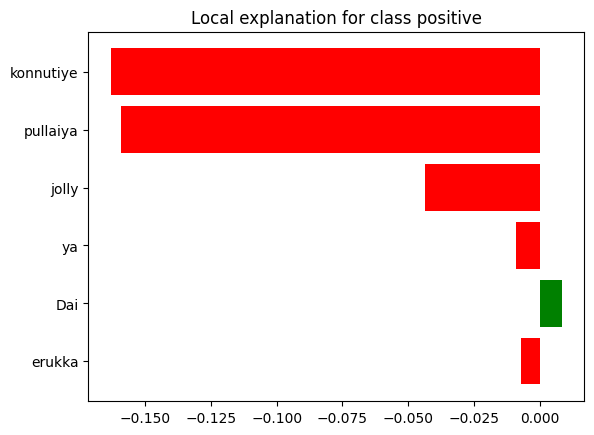

In [130]:

fig = exp.as_pyplot_figure()

In [131]:
exp.show_in_notebook(text=True)

After Applying Explaination AI What to Do ?

After applying Explainable AI (XAI) to your model, the next steps depend on your specific goals and the insights you gained. Here are some possible actions:

**1. Debug and improve your model:**

* Use the explanations to identify features that have large negative or positive impacts on predictions. This can help you pinpoint biases, data issues, or model overfitting.
* Adjust your model training process or feature engineering based on the insights from XAI.

**2. Build trust and communication:**

* Use the explanations to communicate how your model works to stakeholders, clients, and users. This can build trust and acceptance for your AI system.
* Create visual summaries or reports of the explanations to share with non-technical audiences.

**3. Enhance interpretability and fairness:**

* Apply additional XAI techniques to gain deeper understanding of your model's behavior. Consider other algorithms like LIME or partial dependence plots.
* Use the explanations to detect and mitigate potential biases in your model's predictions. This could involve re-balancing your training data or adjusting model hyperparameters.

**4. Integrate explanations into your application:**

* Develop interactive interfaces that allow users to explore the explanations for individual predictions. This can provide valuable feedback and improve user trust.
* Use the explanations to dynamically adjust model behavior or provide personalized recommendations based on user data.

**5. Monitor and maintain explanation quality:**

* As your data and model evolve, periodically check whether the explanations still hold true. You might need to retrain the explainer or adjust its parameters.
* Consider automated monitoring systems that track changes in model behavior and trigger reevaluation of explanations.

User-in-the-loop feedback: Enable users to provide feedback on explanations or predictions, which can be used to improve the model over time.

Remember, XAI is an iterative process. Use the insights you gain to refine your model, improve communication, and ensure responsible AI development.

### **XGB Classifier**

In [65]:
from xgboost import XGBClassifier

In [66]:
xgbc = XGBClassifier(max_delta_step=10.0, max_depth=20,
              n_estimators=100)

In [67]:
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=10.0, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
y_predict = xgbc.predict(x_test)

In [69]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       411
           1       0.80      0.81      0.81       389

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



In [ ]:
c = make_pipeline(tfidf,xgbc)

In [70]:
print(c.predict_proba([text[4]]))
class_names = ['negative', 'positive']
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

[[1.00000000e+00 1.77877257e-18]]


In [71]:
idx = 99
exp = explainer.explain_instance(text[idx], c.predict_proba, num_features=6)
print('Document id: %d' % idx)
print('Probability(christian) =', c.predict_proba([text[idx]])[0,1])
print('True class: %s' % class_names[1])

Document id: 99
Probability(christian) = 6.77317709086261e-23
True class: positive


In [72]:
exp.as_list()

[('sappada', -0.003010618811518106),
 ('thookam', -0.0029744585869238773),
 ('round', -0.002848859975481117),
 ('adipan', -0.0027826951113183065),
 ('sappadu', -0.002721894520404327),
 ('uootum', -0.0026947494505950406)]

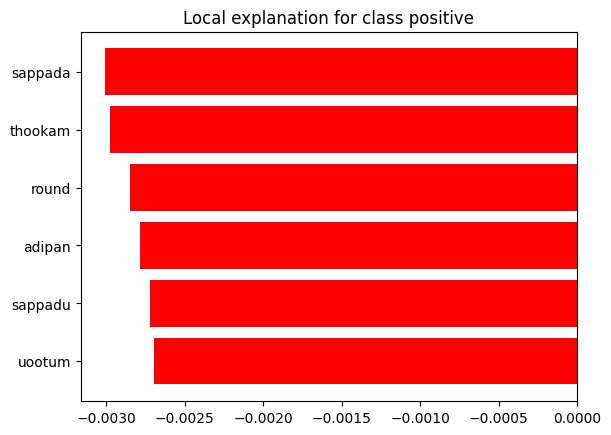

In [73]:

fig = exp.as_pyplot_figure()

In [74]:
exp.show_in_notebook(text=True)

In [75]:
param_grid = [{ 'n_estimators' : [100 , 120 , 90] , 'max_depth' : [15 , 20 , 17 ,22] , 'min_child_weight' : [1.5 , 1.8 , 2.0 , 2.2 , 2.4] , 'max_delta_step' : [9.5 , 9.8 , 10.0 , 10.5 , 11.0]}]

In [ ]:
from sklearn.metrics import f1_score, make_scorer
fone_score = f1_score

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV( xgbc , param_grid , cv =3 , scoring = 'accuracy', return_train_score= True , verbose = 10 )

In [ ]:
grid_search.fit(x_train , y_train)

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
final_model